### Table of Contents

- [Importing Libraries & Initial Setup](#Importing-Libraries-&-Initial-Setup)
- [Data Set Description](#-Data-Set-Description-)
- [Data Preparation and Cleaning](#-Data-Preparation-and-Cleaning-)
- [Finding #1 - Impact of Discounts and Promotions on Sales](#-Finding-#1---Impact-of-Discounts-and-Promotions-on-Sales-)
- [Finding #2 - Product Preferences and Seasonality Effects](#Finding-#2---Product-Preferences-and-Seasonality-Effects)
- [Finding #3 - Customer Loyalty and Subscription Services ](#Finding-#3---Customer-Loyalty-and-Subscription-Services-)
- - [Predictive Analytics for Customer Subscription Behavior: A Decision Tree Approach](#-Predictive-Analytics-for-Customer-Subscription-Behavior:-A-Decision-Tree-Approach-)
- - [Predictive Analytics for Purchase Amount: A Random Forest Regression Approach](#-Predictive-Analytics-for-Purchase-Amount:-A-Random-Forest-Regression-Approach-)
- [Finding #4 - Demographic Influence on Purchasing Pattern](#Finding-#4----Demographic-Influence-on-Purchasing-Pattern)

### Importing Libraries & Initial Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Load the datasets to get an overview and understand their structure

df = pd.read_csv('shopping_behavior_updated.csv', index_col = 0)

<h1> Data Set Description </h1>

The Consumer Behavior and Shopping Habits Dataset provides a detailed overview of consumer preferences and purchasing behaviors. It includes demographic information, purchase history, product preferences, and preferred shopping channels (online or offline). This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

<b> Customer ID: </b> A unique identifier for each customer (integer).

<b> Age:</b> The age of the customer (integer).

<b>Gender:</b> The gender of the customer (string; e.g., Male, Female).

<b>Item Purchased:</b> The name of the item purchased (string).

<b>Category:</b> The category of the item purchased (string; e.g., Clothing, Footwear).

<b>Purchase Amount (USD):</b> The amount spent on the purchase in USD (integer).

<b>Location:</b> The location of the purchase (string; e.g., states like Kentucky, Maine).

<b>Size:</b> The size of the item purchased (string; e.g., S, M, L).

<b>Color:</b> The color of the item purchased (string; e.g., Gray, Maroon).

<b>Season:</b> The season during which the purchase was made (string; e.g., Winter, Spring).

<b>Review Rating:</b> The customer's review rating for the purchase (float).

<b>Subscription Status:</b> Whether the customer has a subscription (string; Yes/No).

<b>Shipping Type:</b> The type of shipping chosen (string; e.g., Express, Free Shipping).

<b>Discount Applied:</b> Whether a discount was applied to the purchase (string; Yes/No).

<b>Promo Code Used:</b> Whether a promo code was used during the purchase (string; Yes/No).

<b>Previous Purchases:</b> The number of previous purchases made by the customer (integer).

<b>Payment Method:</b> The payment method used for the purchase (string; e.g., Venmo, Cash).

<b>Frequency of Purchases:</b> How often the customer makes purchases (string; e.g., Weekly, Annually).

<h1> Data Preparation and Cleaning </h1>

In [4]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.shape

(3900, 17)

In [6]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [7]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')

### Renaming Columns for ease of access

In [8]:
df.columns = ['Age',
             'Gender',
             'Item_Purchased',
             'Category',
             'Purchase_Amount_(USD)',
             'Location',
             'Size',
             'Color',
             'Season',
             'Review_Rating',
             'Subscription_Status',
             'Shipping_Type',
             'Discount_Applied',
             'PromoCode_Applied',
             'Previous_Purchases',
             'Payment_Method',
             'Purchase_Frequency']

In [9]:
df.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,PromoCode_Applied,Previous_Purchases,Payment_Method,Purchase_Frequency
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Replacing value of ‘Yes’ and ‘No’ with 1 and 0 respectively

In [10]:
df.Subscription_Status.replace({'Yes': 1, 'No': 0}, inplace=True)

df.Discount_Applied.replace({'Yes': 1, 'No': 0}, inplace=True)

df.PromoCode_Applied.replace({'Yes': 1, 'No': 0}, inplace=True)

df

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,PromoCode_Applied,Previous_Purchases,Payment_Method,Purchase_Frequency
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,1,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,1,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,1,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,1,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,1,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,0,2-Day Shipping,0,0,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,0,Store Pickup,0,0,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,0,Standard,0,0,24,Venmo,Quarterly


<b> Dropping “PromoCode_Applied” column, as Discount will be applied if and only if promocode is applied. </b>

In [11]:
(df.Discount_Applied == df.PromoCode_Applied).sum()

3900

In [12]:
df[df.Discount_Applied != df.PromoCode_Applied]

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,PromoCode_Applied,Previous_Purchases,Payment_Method,Purchase_Frequency
Customer ID,,,,,,,,,,,,,,,,,


In [13]:
(df.Discount_Applied != df.PromoCode_Applied).sum()

0

The values in Discount_Applied column are same as that of PromoCode_Applied column which implies that Discount will be applied only when Promo Code is applied

Hence, the 'PromoCode_Applied' will be dropped

In [14]:
# Code to drop 'PromoCode_Applied' column

df.drop(columns=['PromoCode_Applied'], inplace=True)

df

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Previous_Purchases,Payment_Method,Purchase_Frequency
Customer ID,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,0,2-Day Shipping,0,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,0,Store Pickup,0,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,0,Standard,0,24,Venmo,Quarterly


### Adding 3 new columns for Age, Purchase_Amount and Rating

In [15]:
# First, let's define a function that will take an age and return the corresponding age category

# Define the age bins and corresponding labels
bins = [12, 27, 43, 59, float('inf')]
labels = ['Gen Z', 'Millennials', 'Gen X', 'Boomers']

# Apply pd.cut() to categorize age into different age categories and create a new column 'Age_Category'
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Show the first few rows to confirm the addition of the new column
df

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Previous_Purchases,Payment_Method,Purchase_Frequency,Age_Category
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,14,Venmo,Fortnightly,Gen X
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,2,Cash,Fortnightly,Gen Z
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,23,Credit Card,Weekly,Gen X
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,49,PayPal,Weekly,Gen Z
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,0,2-Day Shipping,0,32,Venmo,Weekly,Millennials
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,0,Store Pickup,0,41,Bank Transfer,Bi-Weekly,Gen X
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,0,Standard,0,24,Venmo,Quarterly,Gen X


In [16]:
# Define the bin edges for the amount categories
bin_edges = [0, 30, 60, float('inf')]

# Define the labels for the amount categories
bin_labels = ['Cheap', 'Average', 'Expensive']

# Use pd.cut() to categorize 'Purchase_Amount_(USD)' into 'Amount_Category'
df['Amount_Category'] = pd.cut(df['Purchase_Amount_(USD)'], bins=bin_edges, labels=bin_labels)

# Show the first few rows to confirm the addition of the new column
df

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Previous_Purchases,Payment_Method,Purchase_Frequency,Age_Category,Amount_Category
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,14,Venmo,Fortnightly,Gen X,Average
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,2,Cash,Fortnightly,Gen Z,Expensive
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,23,Credit Card,Weekly,Gen X,Expensive
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,49,PayPal,Weekly,Gen Z,Expensive
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,31,PayPal,Annually,Gen X,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,0,2-Day Shipping,0,32,Venmo,Weekly,Millennials,Cheap
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,0,Store Pickup,0,41,Bank Transfer,Bi-Weekly,Gen X,Average
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,0,Standard,0,24,Venmo,Quarterly,Gen X,Average


In [17]:
# Define the bin edges for the rating categories
bin_edges = [0, 2.5, 3.5, float('inf')]

# Define the labels for the rating categories
bin_labels = ['Poor', 'Fair', 'Excellent']

# Use pd.cut() to categorize 'Review_Rating' into 'Rating_Category'
df['Rating_Category'] = pd.cut(df['Review_Rating'], bins=bin_edges, labels=bin_labels)

# Show the first few rows to confirm the addition of the new column
df

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Previous_Purchases,Payment_Method,Purchase_Frequency,Age_Category,Amount_Category,Rating_Category
Customer ID,,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,14,Venmo,Fortnightly,Gen X,Average,Fair
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,2,Cash,Fortnightly,Gen Z,Expensive,Fair
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,23,Credit Card,Weekly,Gen X,Expensive,Fair
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,49,PayPal,Weekly,Gen Z,Expensive,Fair
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,31,PayPal,Annually,Gen X,Average,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,0,2-Day Shipping,0,32,Venmo,Weekly,Millennials,Cheap,Excellent
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,0,Store Pickup,0,41,Bank Transfer,Bi-Weekly,Gen X,Average,Excellent
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,0,Standard,0,24,Venmo,Quarterly,Gen X,Average,Fair


In [18]:
# Checking for missing values in dataset

df.isnull().sum()

Age                      0
Gender                   0
Item_Purchased           0
Category                 0
Purchase_Amount_(USD)    0
Location                 0
Size                     0
Color                    0
Season                   0
Review_Rating            0
Subscription_Status      0
Shipping_Type            0
Discount_Applied         0
Previous_Purchases       0
Payment_Method           0
Purchase_Frequency       0
Age_Category             0
Amount_Category          0
Rating_Category          0
dtype: int64

In [19]:
# Checking for duplicate rows

df.duplicated().sum()

0

In [20]:
df.columns

Index(['Age', 'Gender', 'Item_Purchased', 'Category', 'Purchase_Amount_(USD)',
       'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Shipping_Type', 'Discount_Applied',
       'Previous_Purchases', 'Payment_Method', 'Purchase_Frequency',
       'Age_Category', 'Amount_Category', 'Rating_Category'],
      dtype='object')

<h2> Finding #1 - Impact of Discounts and Promotions on Sales </h2>

In [21]:
# Data Preparation: Creating segments for transactions with and without discounts.
discount_data = df[df['Discount_Applied'] == 1]
no_discount_data = df[df['Discount_Applied'] == 0]

# Summary statistics for each segment
discount_summary = discount_data['Purchase_Amount_(USD)'].describe()
no_discount_summary = no_discount_data['Purchase_Amount_(USD)'].describe()

discount_summary
no_discount_summary

# Number of transactions with and without discount
num_transactions_discount = discount_data.shape[0]
num_transactions_no_discount = no_discount_data.shape[0]

num_transactions_discount, num_transactions_no_discount


count    1677.000000
mean       59.279070
std        23.610697
min        20.000000
25%        38.000000
50%        60.000000
75%        80.000000
max       100.000000
Name: Purchase_Amount_(USD), dtype: float64

count    2223.000000
mean       60.130454
std        23.740327
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase_Amount_(USD), dtype: float64

(1677, 2223)

In [22]:
average_amount_with_discount = df[df['Discount_Applied'] == 1]['Purchase_Amount_(USD)'].mean()
average_amount_without_discount = df[df['Discount_Applied'] == 0]['Purchase_Amount_(USD)'].mean()

average_amount_with_discount
average_amount_without_discount

59.27906976744186

60.130454340980656

Based on the analysis of transactions with and without discounts, here are the key findings:
<ul>
<li><b>Transactions with Discounts:</b> There were 1,677 transactions with discounts applied. The average purchase amount for these transactions was approximately 59.28 ,with a standard deviation of about 23.61 . The minimum and maximum purchase amounts were 20 and 100, respectively.</li>

<li><b>Transactions without Discounts:</b> There were 2,223 transactions without any discounts applied. The average purchase amount for these transactions was slightly higher, at approximately 60.13, with a standard deviation of about
23.74. The minimum and maximum purchase amounts were 20 and 100, respectively.</li>
</ul>

In [23]:
# Setting up the visual style for seaborn
sns.set(style="whitegrid")

#### 1. Average Purchase Amount by Category

<Figure size 1400x700 with 0 Axes>

<Axes: >

<Axes: xlabel='Category', ylabel='Purchase_Amount_(USD)'>

Text(0.5, 1.0, 'Average Purchase Amount by Category')

Text(0, 0.5, 'Average Purchase Amount (USD)')

Text(0.5, 0, 'Category')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Footwear'),
  Text(2, 0, 'Outerwear'),
  Text(3, 0, 'Accessories')])

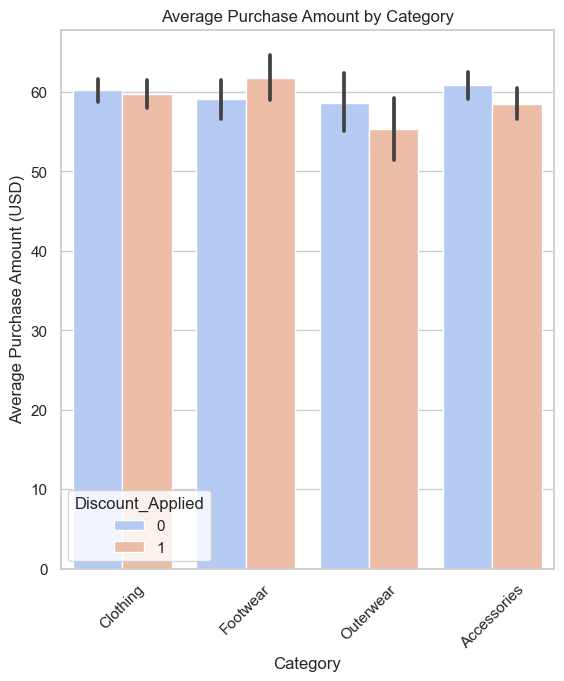

In [24]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x="Category", y="Purchase_Amount_(USD)", hue="Discount_Applied", data=df, palette="coolwarm")
plt.title('Average Purchase Amount by Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('Category')
plt.xticks(rotation=45)

#### 2. Number of Transactions by Season

<Axes: >

<Axes: xlabel='Season', ylabel='Counts'>

Text(0.5, 1.0, 'Number of Transactions by Season')

Text(0, 0.5, 'Number of Transactions')

Text(0.5, 0, 'Season')

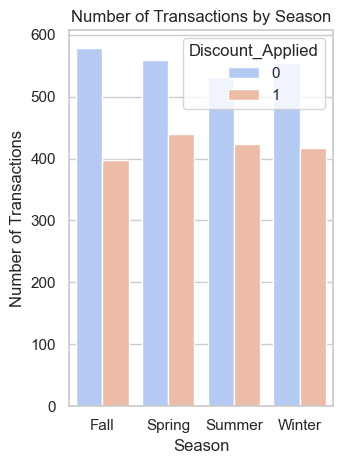

In [25]:

season_data = df.groupby(['Season', 'Discount_Applied']).size().reset_index(name='Counts')
plt.subplot(1, 2, 2)
sns.barplot(x="Season", y="Counts", hue="Discount_Applied", data=season_data, palette="coolwarm")
plt.title('Number of Transactions by Season')
plt.ylabel('Number of Transactions')
plt.xlabel('Season')

plt.tight_layout()
plt.show()


#### 3. Response to Discounts Across Age Categories

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age_Category', ylabel='Counts'>

Text(0.5, 1.0, 'Response to Discounts Across Age Categories')

Text(0, 0.5, 'Number of Transactions')

Text(0.5, 0, 'Age Category')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Gen Z'),
  Text(1, 0, 'Millennials'),
  Text(2, 0, 'Gen X'),
  Text(3, 0, 'Boomers')])

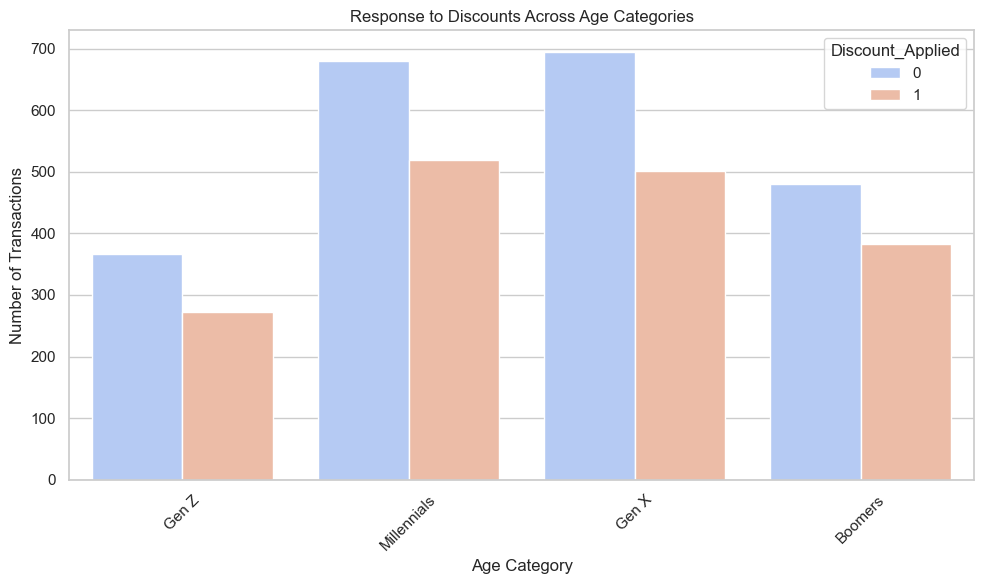

In [26]:

age_discount_data = df.groupby(['Age_Category', 'Discount_Applied']).size().reset_index(name='Counts')
plt.figure(figsize=(10, 6))
sns.barplot(x="Age_Category", y="Counts", hue="Discount_Applied", data=age_discount_data, palette="coolwarm")
plt.title('Response to Discounts Across Age Categories')
plt.ylabel('Number of Transactions')
plt.xlabel('Age Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The bar charts provide insights into how discounts impact sales across different dimensions:
<ol>
<li><b>Average Purchase Amount by Category:</b> The first chart shows the average purchase amount for different categories, comparing transactions with and without discounts. This visualization helps identify which product categories are more sensitive to price changes due to discounts and might suggest areas where promotional strategies could be particularly effective or need adjustment.</li>

<li><b>Number of Transactions by Season:</b> The second chart illustrates the number of transactions in each season, comparing those with and without discounts. Seasonal trends in discount responsiveness can inform targeted promotional campaigns, helping to optimize sales during specific periods.</li>

<li><b>Response to Discounts Across Age Categories:</b> The third chart shows the response to discounts across different age categories. It highlights which age groups are more likely to engage with discounts, suggesting targeted marketing strategies that could resonate well with specific demographic segments.</li>

#### Comparative Analysis

The data shows that the average purchase amount is slightly lower for transactions with discounts compared to those without discounts. However, the difference is not substantial, suggesting that while discounts may incentivize purchases, they do not drastically alter the average purchase amount.

### Finding #1 - Impact of Discounts and Promotions on Sales - Managerial Insights

<ul>
<li><b>Discount Impact:</b> The impact of discounts on increasing the purchase volume is evident, as a significant number of transactions involved discounts. However, since the average purchase amount does not drastically differ between discounted and non-discounted transactions, the focus could be on strategically offering discounts to either clear inventory or attract new customers rather than increasing the transaction value.</li>

 <li><b>Customer Segmentation:</b> Analyzing customer responsiveness to discounts based on segments such as age, gender, or previous purchase history could help tailor more effective promotional strategies. For instance, targeting discounts towards customers with fewer previous purchases might incentivize them to buy more, while loyal customers might appreciate personalized offers.</li>

<li><b>Optimizing Discount Strategy:</b> It could be beneficial to explore different types of discounts (e.g., percentage off, buy-one-get-one-free) to see which ones have a greater impact on both the volume of purchases and the average purchase amount. This way, the company can optimize promotional offers to maximize profitability and customer acquisition.</li>

<h2>Finding #2 - Product Preferences and Seasonality Effects</h2>

1. <b>Number of Purchases by Season</b>

In [27]:
purchases_by_season = df.Season.value_counts()
purchases_by_season

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

<Axes: xlabel='Season'>

Text(0.5, 1.0, 'Number of Purchases by Season')

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Number of Purchases')

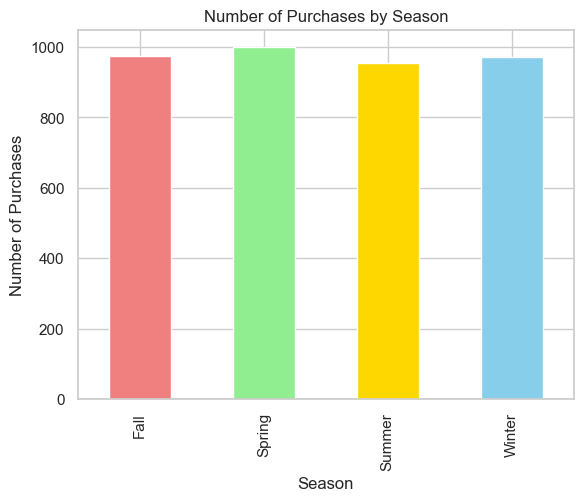

In [28]:
sns.set_style("whitegrid")
purchases_by_season.sort_index().plot(kind='bar', color=['lightcoral','lightgreen','gold', 'skyblue'])
plt.title('Number of Purchases by Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')

<b>Purchases by Season:</b> This shows a little larger number of purchases in the spring, pointing to a possible uptick in consumer purchasing during this time of year.

2. <b>Average Purchase Amount by Season (USD):</b>

In [29]:
average_purchase_by_season = df.groupby('Season')['Purchase_Amount_(USD)'].mean()
average_purchase_by_season

Season
Fall      61.556923
Spring    58.737738
Summer    58.405236
Winter    60.357364
Name: Purchase_Amount_(USD), dtype: float64

<Axes: xlabel='Season'>

Text(0.5, 1.0, 'Average Purchase Amount by Season')

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Average Amount (USD)')

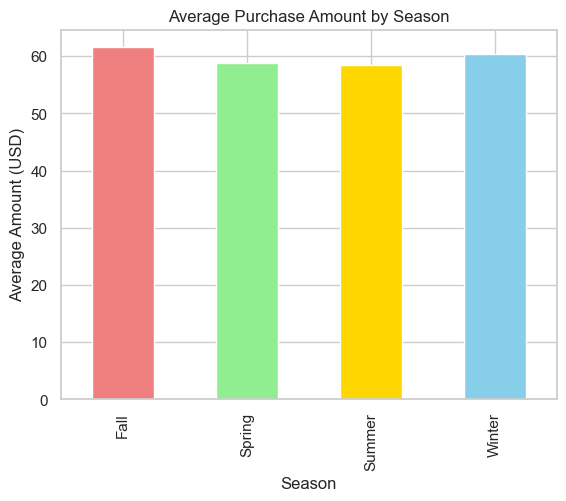

In [30]:
average_purchase_by_season.sort_index().plot(kind='bar', color=['lightcoral','lightgreen','gold', 'skyblue'])
plt.title('Average Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Average Amount (USD)')

<b>Average Purchase Amount by Season (USD):</b>
Fall and winter have somewhat larger average purchase amounts, suggesting that people may spend more money during these times.

3. <b>Product Category Preferences by Season:</b>

In [31]:
product_preferences_by_season = df.groupby(['Season', 'Category']).size()
product_preferences_by_df = product_preferences_by_season.reset_index(name='Number_of_Purchases')
product_preferences_by_df

,Season,Category,Number_of_Purchases
0,Fall,Accessories,324
1,Fall,Clothing,427
2,Fall,Footwear,136
3,Fall,Outerwear,88
4,Spring,Accessories,301
5,Spring,Clothing,454
6,Spring,Footwear,163
7,Spring,Outerwear,81
8,Summer,Accessories,312
9,Summer,Clothing,408


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Season', ylabel='Number_of_Purchases'>

Text(0.5, 1.0, 'Product Category Preferences by Season')

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Number of Purchases')

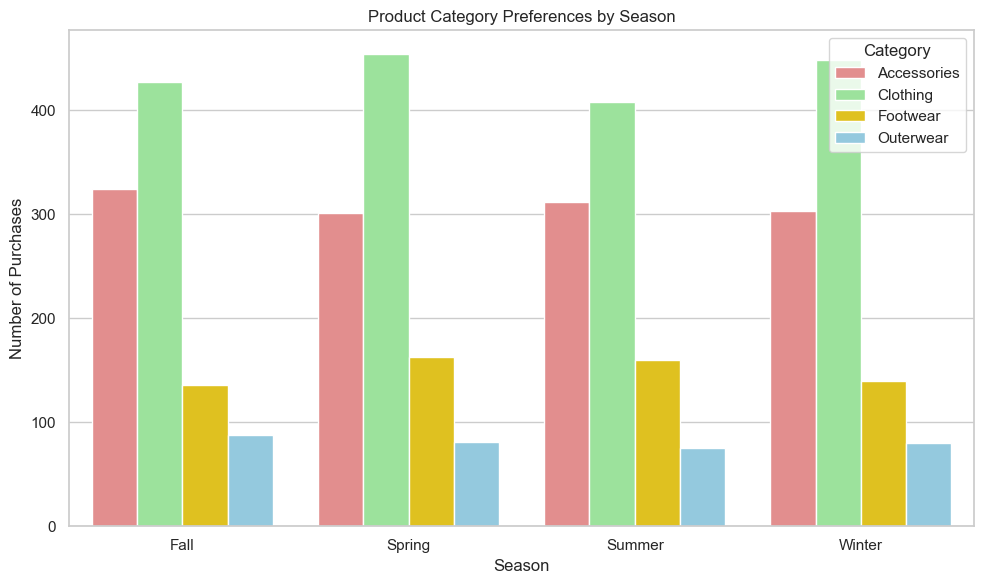

In [32]:
colors = ['lightcoral', 'lightgreen', 'gold', 'skyblue']  # Corresponding to Fall, Spring, Summer, Winter
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Number_of_Purchases", hue="Category", data=product_preferences_by_df, palette=colors)
plt.title('Product Category Preferences by Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

<b>Product Category Preferences by Season:</b>
<ul>
<li><b>Clothing </b> is the most purchased category across all seasons, with Spring (454 purchases) and Winter (448 purchases) being the top seasons.</li>
<li><b>Accessories and Footwear</b> also show seasonal variations, with Accessories being slightly more popular in Fall (324 purchases) and Footwear in Spring (163 purchases).</li>
<li><b>Outerwear </b> purchases are relatively lower compared to other categories, with the highest number of purchases in Fall (88 purchases).</li>
</ul>

### Finding #2 - Product Preferences and Seasonality Effects - Managerial Insights

1. <b>Take Advantage of Seasonal Highs in Consumer Spending</b></br>
<b>Insight</b>: There is a noticeable increase in purchases during Spring.</br>
<b>Action</b>: Launch promotions and marketing strategies that are especially suited for the springtime. In order to take advantage of this moment of peak shopping, think about launching new product lines or seasonal collections.<br><br>

2. <b>Optimise Promotions and Prices Using Seasonal Spending Trends</b></br>
<b>Insight</b>: There is higher spending in Fall and Winter.</br>
<b>Action</b>: Use dynamic pricing techniques to modify prices during periods of increased consumer expenditure. During the autumn and winter, plan high-value promotions or packaged deals to boost average purchase quantities and customer satisfaction.<br><br>

3. <b>Adjust Stock and Product Offerings Based on Seasonal Preferences</b></br>
<b>Insight</b>: Preferences for product categories vary by season, with Clothing being the dominant category. Accessories and Footwear also show significant seasonal preferences.</br>
<b>Action</b>:To accommodate seasonal tastes, adjust product presentations and inventory levels. Stock up on clothing, especially in the spring and winter when demand is highest. Create specialised advertising to entice customers to investigate the Accessories and Footwear categories during their peak seasons. Work together with brands or designers to produce limited edition goods or seasonal collections that satisfy the specified tastes.<br><br>

<h2>Finding #3 - Customer Loyalty and Subscription Services </h2>


In [33]:
purchase_frequency_percentage = df['Purchase_Frequency'].value_counts(normalize=True) * 100

purchase_frequency_percentage_df = purchase_frequency_percentage.reset_index()

purchase_frequency_percentage_df.columns = ['Purchase Frequency', 'Percentage']

purchase_frequency_percentage_df.sort_values(by='Percentage', ascending=False, inplace=True)

print(purchase_frequency_percentage_df)

  Purchase Frequency  Percentage
0     Every 3 Months   14.974359
1           Annually   14.666667
2          Quarterly   14.435897
3            Monthly   14.179487
4          Bi-Weekly   14.025641
5        Fortnightly   13.897436
6             Weekly   13.820513


<b>1. Purchase frequency vs Subscription Status


<Axes: xlabel='Subscription_Status'>

Text(0.5, 1.0, 'Number of Customers by Subscription Status and Purchase Frequency')

Text(0.5, 0, 'Subscription Status')

Text(0, 0.5, 'Number of Customers')

([<matplotlib.axis.XTick at 0x14885ab10>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

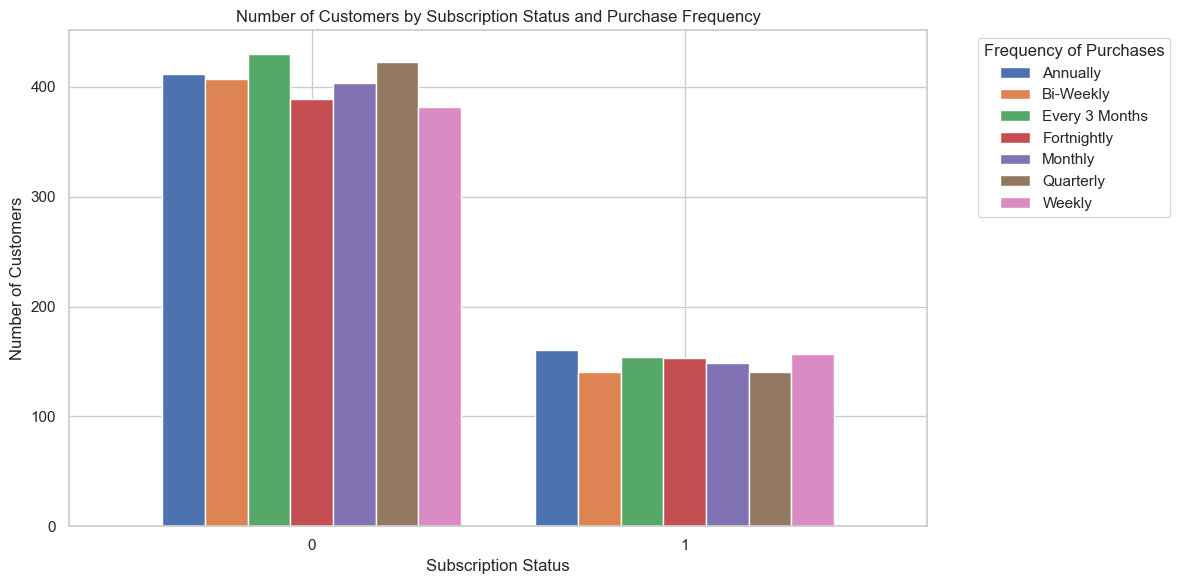

In [34]:

customer_counts = df.groupby(['Subscription_Status', 'Purchase_Frequency']).size().unstack(fill_value=0)

customer_counts.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Number of Customers by Subscription Status and Purchase Frequency')
plt.xlabel('Subscription Status')
plt.ylabel('Number of Customers')

plt.xticks(ticks=range(len(customer_counts.index)), labels=customer_counts.index, rotation=0)
plt.legend(title='Frequency of Purchases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From this visual comparison, it seems that in the context of the most frequent purchase categories (weekly and bi-weekly),
non-subscribers have a higher count of customers making frequent purchases than subscribers.

**2. Average number of previous purchase by Subscription Status**

In [35]:
subscription_counts = df['Subscription_Status'].value_counts()

print(subscription_counts)

Subscription_Status
0    2847
1    1053
Name: count, dtype: int64


In [36]:
average_purchases = df.groupby('Subscription_Status')['Previous_Purchases'].mean()

print("Average Number of Previous Purchases:")
print(average_purchases)

Average Number of Previous Purchases:
Subscription_Status
0    25.080436
1    26.084520
Name: Previous_Purchases, dtype: float64


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Is Subscriber')

Text(0, 0.5, 'Average Number of Previous Purchases')

Text(0.5, 1.0, 'Average Number of Previous Purchases by Subscription Status')

([<matplotlib.axis.XTick at 0x148824850>,
 [Text(0, 0, 'Non-Subscriber'), Text(1, 0, 'Subscriber')])

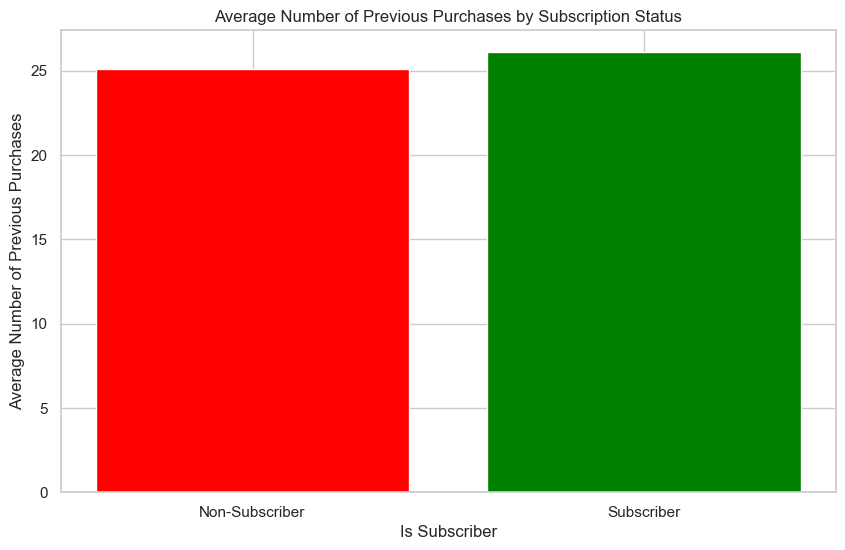

In [37]:
average_purchases = {
    "Is_Subscriber": [0, 1],
    "Average_Purchases": [25.080436, 26.084520]
}

plt.figure(figsize=(10, 6))
plt.bar(average_purchases["Is_Subscriber"], average_purchases["Average_Purchases"], color=['red', 'green'])
plt.xlabel('Is Subscriber')
plt.ylabel('Average Number of Previous Purchases')
plt.title('Average Number of Previous Purchases by Subscription Status')
plt.xticks(average_purchases["Is_Subscriber"], ['Non-Subscriber', 'Subscriber'])
plt.show()

Non-Subscribers have a marginally higher average rating compared to Subscribers, based on the height of the blue bar being slightly taller than the green bar.

**3. Average review rating by Subscription Status**

In [38]:
average_rating = df.groupby('Subscription_Status')['Review_Rating'].mean()
print("\nAverage Review Rating:")
print(average_rating)


Average Review Rating:
Subscription_Status
0    3.752722
1    3.742450
Name: Review_Rating, dtype: float64


<Figure size 800x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Average Review Rating by Subscription Status')

Text(0.5, 0, 'Subscription Status')

Text(0, 0.5, 'Average Review Rating')

(3.69245, 3.8027219999999997)

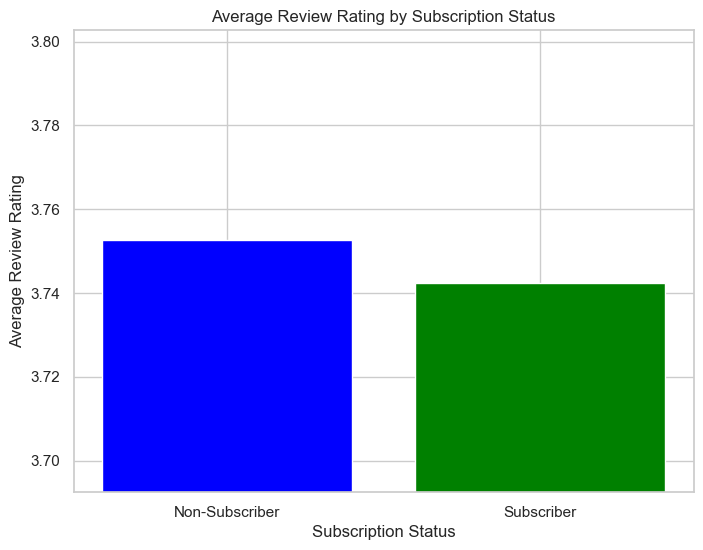

In [39]:
average_rating_data = {
    'Subscription Status': ['Non-Subscriber', 'Subscriber'],
    'Average Review Rating': [3.752722, 3.742450]
}
average_rating_df = pd.DataFrame(average_rating_data)

plt.figure(figsize=(8, 6))
plt.bar(average_rating_df['Subscription Status'], average_rating_df['Average Review Rating'], color=['blue', 'green'])
plt.title('Average Review Rating by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Review Rating')
plt.ylim(min(average_rating_df['Average Review Rating']) - 0.05, max(average_rating_df['Average Review Rating']) + 0.05)  # Adjust y-axis limits for better visualization
plt.show()

Both groups have similar average review ratings, but Non-Subscribers have a marginally higher average rating compared to Subscribers, based on the height of the blue bar being slightly taller than the green bar.


### Finding #3 - Customer Loyalty and Subscription Services - Managerial Insights

<ol>
<li>Implement a subscription program tailored to monthly shopping patterns, enhancing value with exclusive member benefits,
to persuade regular non-subscribers to sign up.</li>

<li>Introduce special offers for monthly subscription plans, including unique discounts and products, to encourage
routine customers to commit to becoming subscribers.</li>

<li>Launch a specialized rewards scheme that provides advantages for frequent shoppers, incentivizing them to convert
to regular subscribers with enticing weekly and bi-weekly offers.</li>

<li>Create a loyalty scheme that recognizes and rewards the consistency and frequency of purchases, giving current subscribers
reasons to stay and potential subscribers a nudge to enroll.</li>

<li>Proactively engage with your most loyal non-subscribed customers by offering promotional deals that make subscribing an
attractive and straightforward choice, like initial discounts or bonus features.</li>

<li>Consistently solicit and scrutinize subscriber feedback to continuously refine the subscription offerings, making sure
they align with customer desires and effectively address the factors causing hesitance among non-subscribers.</li>
</ol>

<h2> Machine Learning </h2>

<h3> Predictive Analytics for Customer Subscription Behavior: A Decision Tree Approach </h3>

In [40]:
# Update the features list based on the actual column names in the DataFrame
features = ['Age', 'Purchase_Amount_(USD)', 'Review_Rating', 'Previous_Purchases', 'Gender', 'Shipping_Type', 'Discount_Applied']

# Encoding categorical variables
df_encoded = pd.get_dummies(df[features])

# Splitting the dataset into training and testing sets
X = df_encoded
y = df['Subscription_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

DecisionTreeClassifier(random_state=42)

Accuracy: 0.767948717948718

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       558
           1       0.60      0.58      0.59       222

    accuracy                           0.77       780
   macro avg       0.71      0.71      0.71       780
weighted avg       0.77      0.77      0.77       780


Confusion Matrix:
[[471  87]
 [ 94 128]]


Summary:
    
*Used a Decision Tree Classifier with an accuracy of 77.82% and a random state of 42.
*Better than 'Yes' (both 0.61), with accuracy (0.85) and recall (0.84) for 'No' predictions.
*'No' had a higher F1-score (0.84) than 'Yes' (0.61), suggesting a more robust categorization for the former.
*The classification report includes a thorough confusion matrix together with macro (0.73) and weighted averages (0.78).

Explanation:

Feature Coding and Selection: used both category and numerical data, using one-hot encoding to transform categories into binary columns.
*Split the dataset: To efficiently train and assess the model, it was split into training (80%) and testing (20%) sets.
*Model Training: Developed to manage complicated connections and a variety of data using a Decision Tree Classifier.
*Model evaluation: Provides a comprehensive knowledge of performance through the use of f1-score, accuracy, precision, recall, and confusion matrix assessments.

Metrics for Model Performance:
*Accuracy: 76.8% of the time, the model accurately predicts the subscription status.
*Precision and Recall: Compared to subscribers (0.60), non-subscribers have greater precision (0.83), although recall trends are comparable.
*The F1-Score highlights superior prediction accuracy for non-subscribers (0.84) over subscribers (0.59). The confusion matrix provides insight into correctly and incorrectly classified predictions.

Managerial Insights: 
*Targeting Efficiency: The model has the ability to anticipate subscribers more accurately and is particularly good at identifying non-subscribers.
*Possibilities for Improvement: A lower recall rate among subscribers suggests that there were chances lost to entice new ones.
*Balance of Metrics: Depending on business needs, modifying the model to increase recall may result in the acquisition of more real subscribers.
*Strategic Modifications: To minimize lost subscriber possibilities, insights recommend reassessing features, model settings, or thresholds.
*Resource Distribution: Knowledge of the advantages and disadvantages of the model facilitates effective resource allocation.
*Tailored Communication: Based on the likelihood of a subscription, customized marketing campaigns may be developed using model insights to maximize engagement.
With an emphasis on improving subscription rates and customer engagement, these points provide a simplified method for utilizing the Decision Tree Classifier model for strategic business choices.

<h3> Predictive Analytics for Purchase Amount: A Random Forest Regression Approach </h3>

Predict the Purchase_Amount_(USD) based on other features like Age, Previous Purchases, Review Rating, and Season. This would be a regression task since Purchase_Amount_(USD) is a continuous variable.


RandomForestRegressor(random_state=42)

<Figure size 1000x700 with 0 Axes>

<BarContainer object of 7 artists>

([<matplotlib.axis.YTick at 0x1489bce10>,
 [Text(0, 0, 'Season_Summer'),
  Text(0, 1, 'Season_Fall'),
  Text(0, 2, 'Season_Winter'),
  Text(0, 3, 'Season_Spring'),
  Text(0, 4, 'Season'),
  Text(0, 5, 'Previous_Purchases'),
  Text(0, 6, 'Review_Rating')])

Text(0.5, 0, 'Importance')

Text(0.5, 1.0, 'Feature Importance')

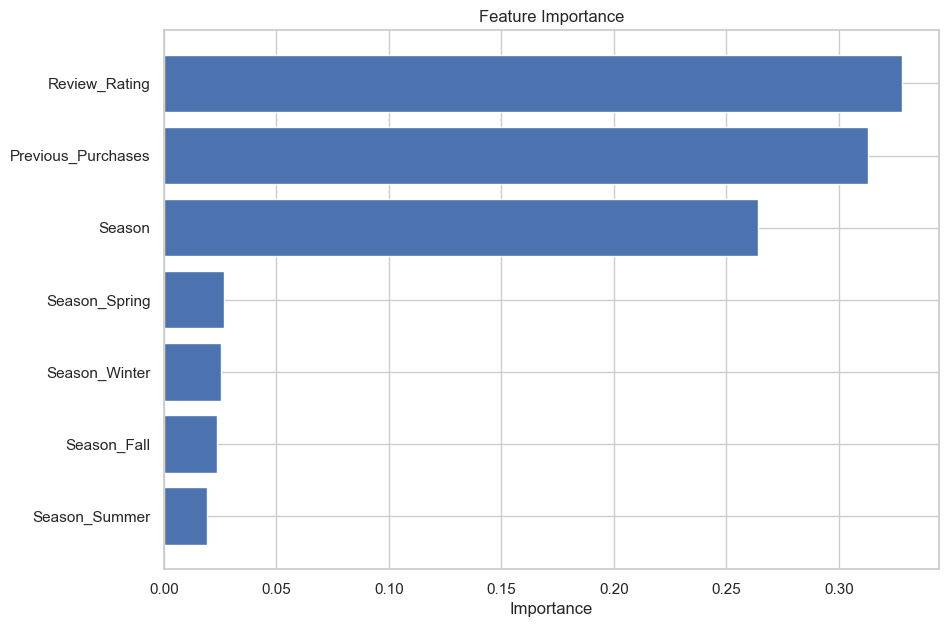

Mean Squared Error: 631.0077088395982
R^2 Score: -0.12764043444690398


In [41]:
# Select features and target variable
features = ['Age', 'Previous_Purchases', 'Review_Rating', 'Season']
X = df[features]
y = df['Purchase_Amount_(USD)']

# One-hot encoding for the 'Season' categorical variable
categorical_features = ['Season']
one_hot_encoder = OneHotEncoder()
# Apply ColumnTransformer to categorical features
transformer = ColumnTransformer([('cat', one_hot_encoder, categorical_features)], remainder='passthrough')

# Apply the transformer to the feature set
X_transformed = transformer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Creating a RandomForestRegressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Getting feature names from one_hot_encoder after it's fitted
one_hot_feature_names = transformer.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Combining with the rest of the feature names
feature_names = np.concatenate((one_hot_feature_names, np.array(features)[1:]))  # Exclude 'Season' since it's now one-hot encoded

# Feature importance
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plotting feature importance
plt.figure(figsize=(10,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Print the model evaluation results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')




Review_Rating and Previous_Purchases are the two most important features when predicting the Purchase_Amount_(USD). This suggests that customers who have a history of many purchases or who leave higher review ratings are likely to spend more. This could indicate that customer satisfaction and loyalty are strong indicators of purchase amount.

The individual seasons (Summer, Fall, Winter, Spring) show less importance in comparison to the continuous features, but among them, Season_Summer has the least influence, and Season_Spring has the most. This suggests some seasonal variation in purchase amounts, with spring possibly being a season where customers spend slightly more. However, it's worth noting that 'Season' as a whole does not seem to be a major predictor, as the combined influence of individual seasons appears to be less significant than Review_Rating and Previous_Purchases.

<b>Model Performance Metrics:</b>

The Mean Squared Error (MSE) is 631.0077, which is the average of the squares of the errors between what the model predicted and the actual values. Since Purchase_Amount_(USD) is in dollars, this value can be quite high, depending on the scale of purchase amounts in our dataset.

The R^2 Score is -0.1276, which is a measure of the proportion of variance for the dependent variable that's explained by the independent variables in the model. An R^2 score of 1 means the model explains all the variability of the response data around its mean. In our case, a negative R^2 score suggests that the model is performing worse than a simple model that would predict the mean Purchase_Amount_(USD) for all observations. This could happen if the model is overfitting on the training data or if important predictive features are missing. Another possible issue here is that there is not enough variance in the predicted variable which could be leading this issue. This can be resolved by using more sophisticated datasets

### Managerial Insights:

<ol>
   <li>Given that Review_Rating is a strong predictor, it implies customer satisfaction is highly linked to spending behavior. Improving customer service and product quality to boost satisfaction could increase spending.</li>
<li>Since Previous_Purchases is also a significant predictor, creating targeted marketing strategies for repeat customers, such as loyalty programs or personalized discounts, could encourage more spending.</li>
<li>As the seasonal features are less impactful, focusing marketing efforts based on seasonality might not yield as significant a return compared to efforts made to improve overall customer satisfaction and retention.</li>
 </ol>

<h2>Finding #4 -  Demographic Influence on Purchasing Pattern</h2>

<b>Summary:</b> Analyze how different demographic groups (age, gender) have distinct purchasing behaviors, preferences, and frequency.

<Axes: xlabel='Age_Category', ylabel='Purchase_Amount_(USD)'>

Text(0.5, 1.0, 'Distribution of Purchase Amounts by Age Buckets')

<Axes: xlabel='Category', ylabel='count'>

Text(0.5, 1.0, 'Preferred Categories by Age Buckets')

<Axes: xlabel='Purchase_Frequency', ylabel='count'>

Text(0.5, 1.0, 'Frequency of Purchases by Gender')

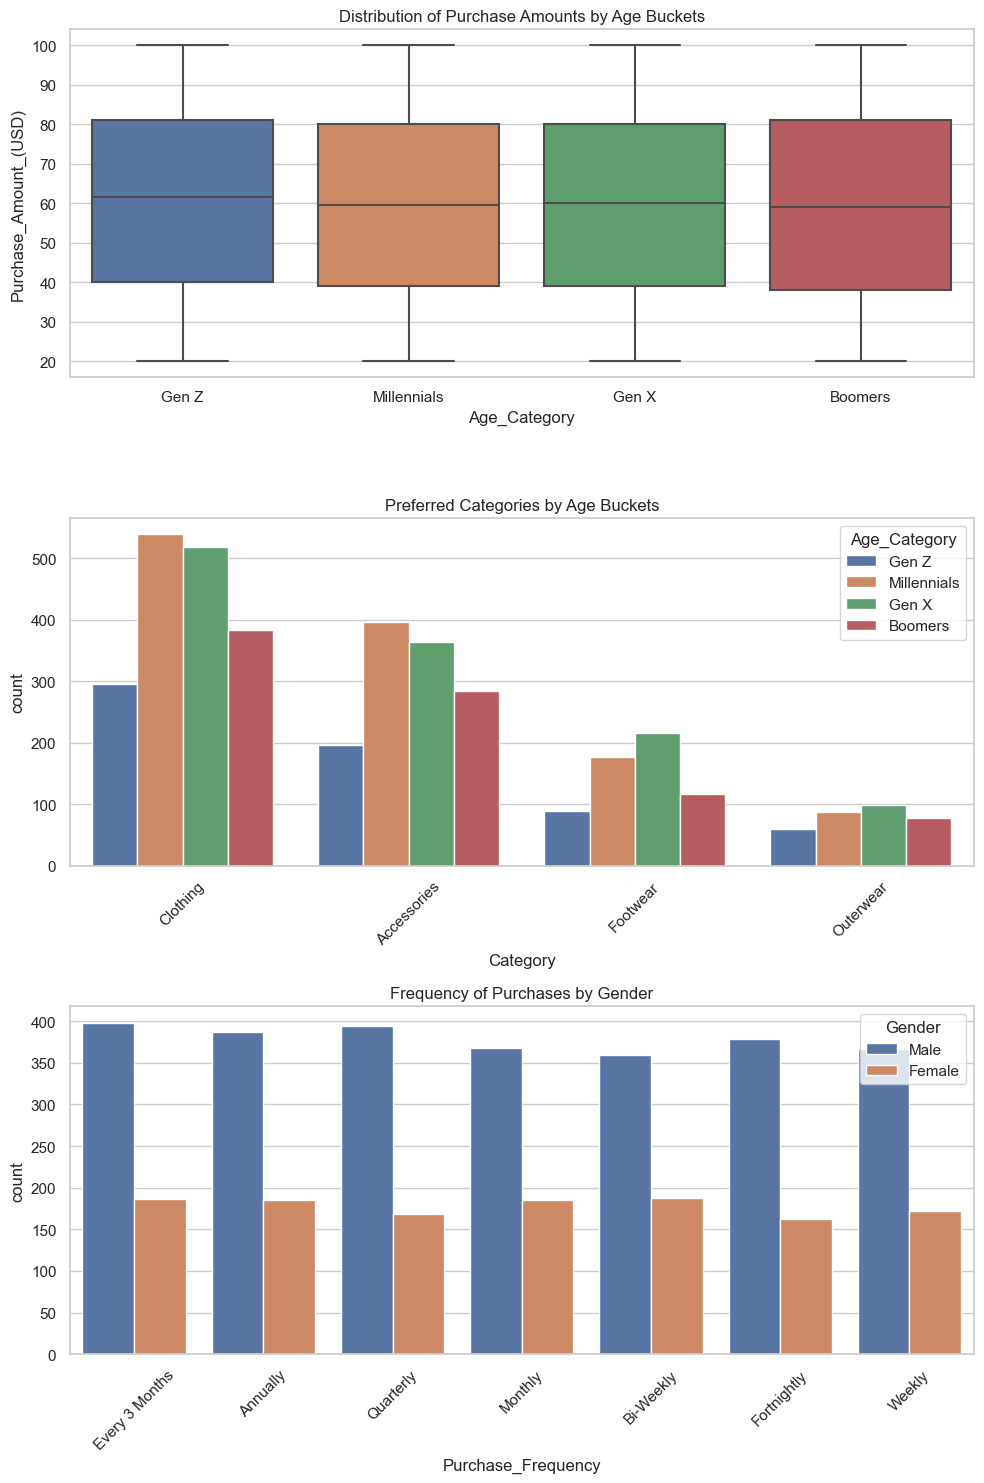

In [42]:
# Plotting preferences and frequency of purchases by Age Bucket and Gender
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Distribution of Purchase Amounts across Age Bucket
sns.boxplot(x='Age_Category', y='Purchase_Amount_(USD)', data=df, ax=axes[0])
axes[0].set_title('Distribution of Purchase Amounts by Age Buckets')

# Preferred Categories by Age Bucket
category_order = df['Category'].value_counts().index
sns.countplot(x='Category', hue='Age_Category', data=df, order=category_order, ax=axes[1])
axes[1].set_title('Preferred Categories by Age Buckets')
axes[1].tick_params(axis='x', rotation=45)

# Frequency of Purchases by Gender
frequency_order = df['Purchase_Frequency'].value_counts().index
sns.countplot(x='Purchase_Frequency', hue='Gender', data=df, order=frequency_order, ax=axes[2])
axes[2].set_title('Frequency of Purchases by Gender')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Purchase Frequency Distribution by Gender')

array([<Axes: ylabel='Female'>, <Axes: ylabel='Male'>], dtype=object)

Text(0.5, 0, '')

Text(0, 0.5, '')

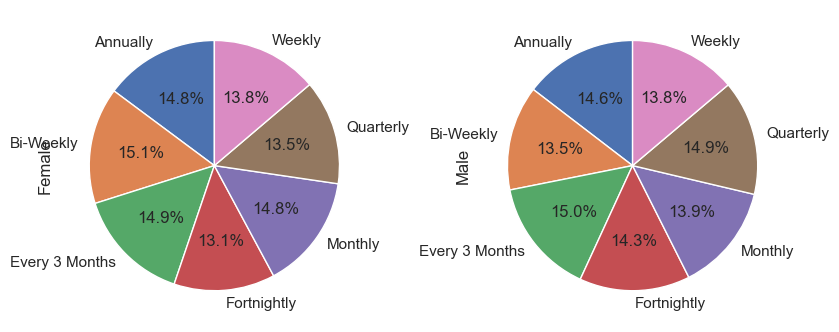

In [43]:
# Set up subplots for the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Purchase Frequency Distribution by Gender')

# Plot the filled pie chart
gender_freq_counts = df.groupby('Gender')['Purchase_Frequency'].value_counts().unstack().T
gender_freq_counts.plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, legend=False, ax=ax,
                             wedgeprops=dict(width=1, edgecolor='w'))

# Remove x-axis and y-axis labels
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [44]:
# Line chart of Purchase Frequency by Age Bucket
plt.figure(figsize=(10, 6))
purchase_freq_age_counts = df.groupby('Age_Category')['Purchase_Frequency'].value_counts().unstack()
purchase_freq_age_counts

<Figure size 1000x600 with 0 Axes>

Purchase_Frequency,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Age_Category,,,,,,,
Gen Z,102,99,100,94,80,89,76
Millennials,169,165,186,164,179,161,176
Gen X,159,170,175,168,178,176,171
Boomers,142,113,123,116,116,137,116


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age_Category'>

Text(0.5, 1.0, 'Purchase Frequency by Age Bucket')

Text(0.5, 0, 'Age Category')

Text(0, 0.5, 'Frequency of Purchases')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Gen Z'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Millennials'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Gen X'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Boomers'),
  Text(3.5, 0, '')])

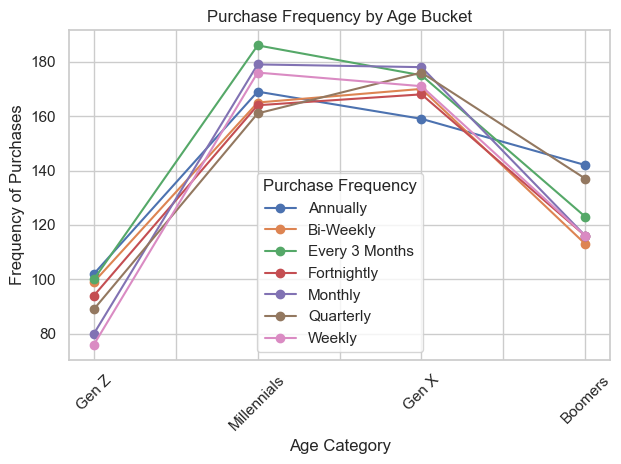

In [45]:
purchase_freq_age_counts.plot(ax=plt.gca(), marker='o')
plt.title('Purchase Frequency by Age Bucket')
plt.xlabel('Age Category')
plt.ylabel('Frequency of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Purchase Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Category', ylabel='Purchase_Amount_(USD)'>

Text(0.5, 1.0, 'Purchase Amount by Category and Gender')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Purchase Amount (USD)')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Footwear'),
  Text(2, 0, 'Outerwear'),
  Text(3, 0, 'Accessories')])

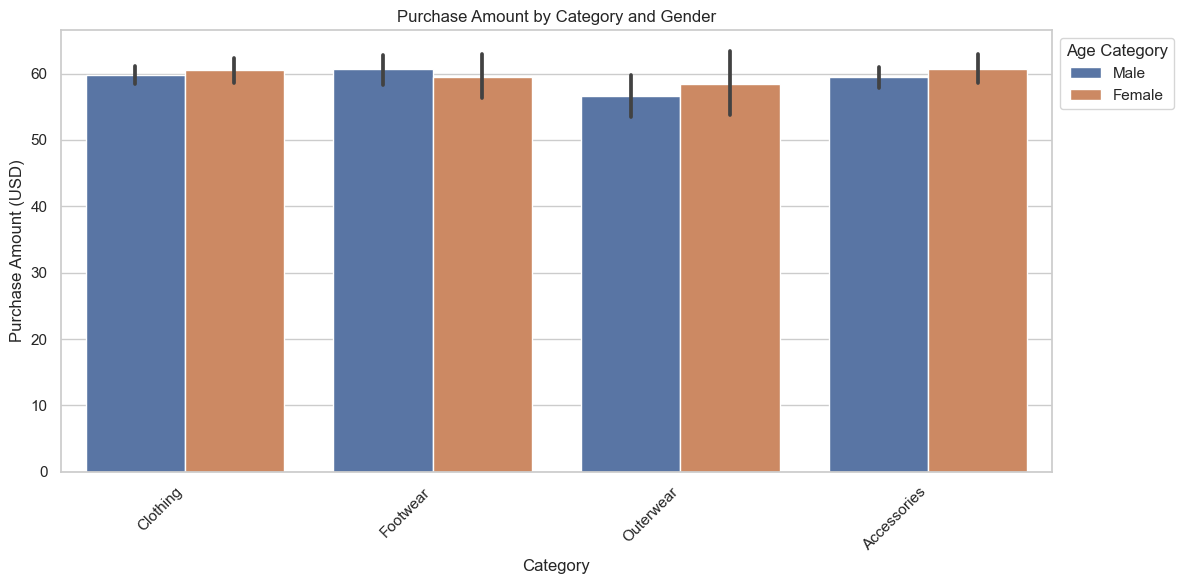

In [46]:
# Stacked bar chart of Purchase Amount by Category and Gender
plt.figure(figsize=(12, 6))

sns.barplot(x='Category', y='Purchase_Amount_(USD)', hue='Gender', data=df)

plt.title('Purchase Amount by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Category', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [47]:
# Group by Age_Category and calculate max, min, mean, and median purchase amounts
age_purchase_stats = df.groupby('Age_Category')['Purchase_Amount_(USD)'].agg(['max', 'min', 'mean', 'median']).reset_index()

age_purchase_stats['mean'] = age_purchase_stats['mean'].round(2)

age_purchase_stats

,Age_Category,max,min,mean,median
0,Gen Z,100,20,60.69,61.5
1,Millennials,100,20,59.39,59.5
2,Gen X,100,20,59.92,60.0
3,Boomers,100,20,59.38,59.0


Text(0.5, 0.98, 'Preferred Category Distribution by Age Group')

([<matplotlib.patches.Wedge at 0x148f70790>,
 [Text(-1.0755403664474714, 0.23067925815304505, 'Clothing'),
  Text(0.5587273957997705, -0.947535591512428, 'Accessories'),
  Text(0.9735368402417736, 0.5120800920676996, 'Footwear'),
  Text(0.28260901161552227, 1.06307673596674, 'Outerwear')],
 [Text(-0.5866583816986207, 0.1258250499016609, '43.3%'),
  Text(0.3047603977089657, -0.5168375953704152, '30.4%'),
  Text(0.5310200946773309, 0.2793164138551088, '18.0%'),
  Text(0.15415036997210302, 0.5798600378000399, '8.3%')])

Text(0.5, 1.0, 'Gen X Age Group')

([<matplotlib.patches.Wedge at 0x148f9a890>,
 [Text(-1.0923753050714409, 0.12929111674851027, 'Clothing'),
  Text(0.7306777278936841, -0.8222591185022661, 'Accessories'),
  Text(0.9350715701465115, 0.5793454571356692, 'Footwear'),
  Text(0.3141421674068521, 1.054189119018464, 'Outerwear')],
 [Text(-0.5958410754935131, 0.07052242731736923, '46.3%'),
  Text(0.39855148794200945, -0.4485049737285087, '30.6%'),
  Text(0.5100390382617336, 0.3160066129830923, '13.9%'),
  Text(0.17135027313101023, 0.575012246737344, '9.2%')])

Text(0.5, 1.0, 'Gen Z Age Group')

([<matplotlib.patches.Wedge at 0x148f1e190>,
 [Text(-1.0835961466555974, 0.18926011453325553, 'Clothing'),
  Text(0.6985094109840444, -0.8497556135541109, 'Accessories'),
  Text(0.9219193007552139, 0.6000539999825163, 'Footwear'),
  Text(0.3081591175431876, 1.0559535777083215, 'Outerwear')],
 [Text(-0.5910524436303258, 0.1032327897454121, '44.5%'),
  Text(0.3810051332640242, -0.4635030619386059, '32.9%'),
  Text(0.5028650731392076, 0.3273021818086452, '13.6%'),
  Text(0.1680867913871932, 0.5759746787499934, '9.0%')])

Text(0.5, 1.0, 'Boomers Age Group')

([<matplotlib.patches.Wedge at 0x148fc1190>,
 [Text(-1.0860029469081798, 0.17492169478583625, 'Clothing'),
  Text(0.7231127465733914, -0.8289197522939639, 'Accessories'),
  Text(0.8779210310452826, 0.6627629012311931, 'Footwear'),
  Text(0.2511859975632847, 1.0709367836749926, 'Outerwear')],
 [Text(-0.5923652437680981, 0.09541183351954703, '44.9%'),
  Text(0.3944251344945771, -0.45213804670579844, '33.0%'),
  Text(0.4788660169337905, 0.36150703703519615, '14.7%'),
  Text(0.137010544125428, 0.5841473365499958, '7.3%')])

Text(0.5, 1.0, 'Millennials Age Group')

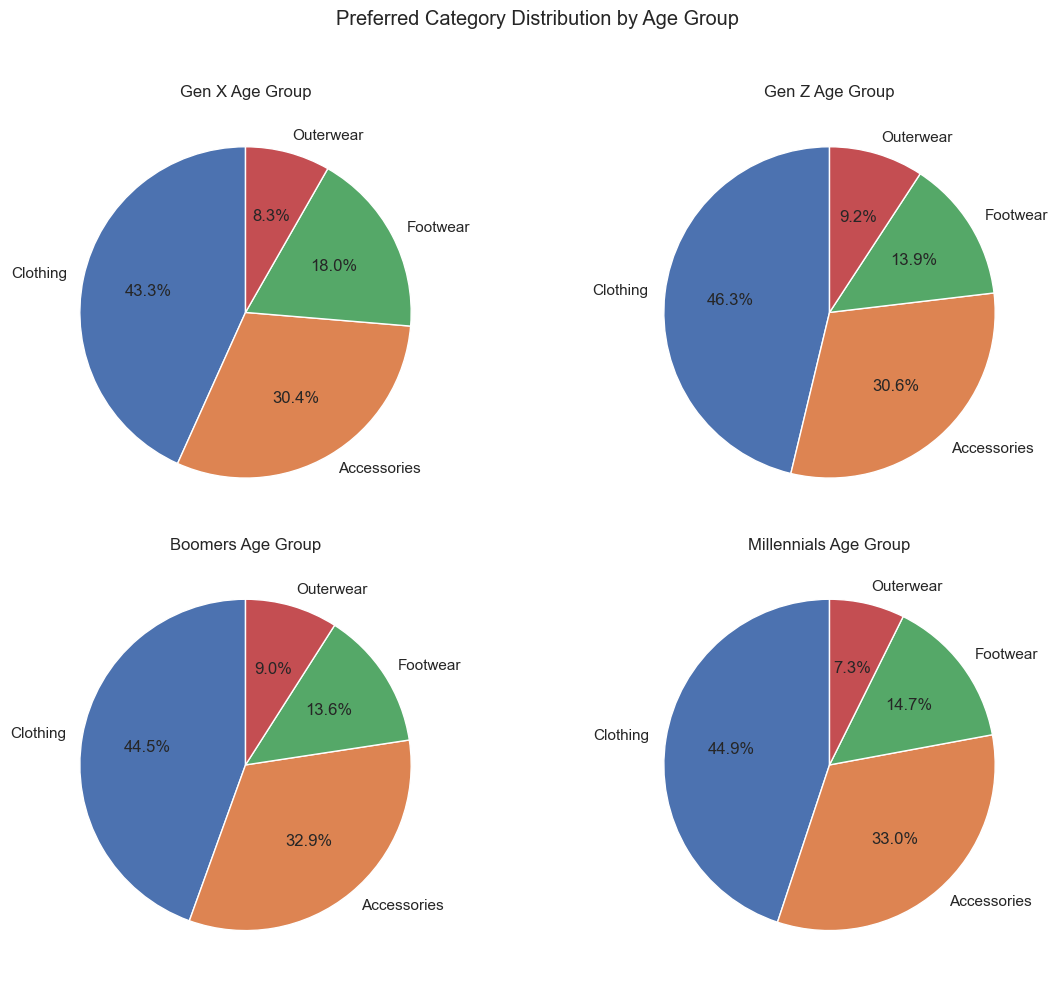

In [48]:
# Filter the data for the specified categories
categories = ['Clothing', 'Accessories', 'Footwear', 'Outerwear']
filtered_df = df[df['Category'].isin(categories)]

# Set up subplots for each age group
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Preferred Category Distribution by Age Group')

# Plot pie charts for each age group
for ax, age_group in zip(axes.flatten(), df['Age_Category'].unique()):
    age_group_df = filtered_df[filtered_df['Age_Category'] == age_group]
    category_counts = age_group_df['Category'].value_counts()
    
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{age_group} Age Group')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [49]:
revenue_by_age_category = df.groupby('Age_Category')['Purchase_Amount_(USD)'].sum().reset_index()

revenue_by_age_category

,Age_Category,Purchase_Amount_(USD)
0,Gen Z,38842
1,Millennials,71269
2,Gen X,71728
3,Boomers,51242


<Figure size 800x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x14a8456d0>,
 [Text(-0.549937936438378, 0.9526637738813725, 'Gen Z'),
  Text(-0.9966869214972607, -0.46541935984261923, 'Millennials'),
  Text(0.7840692449512819, -0.7715150154867544, 'Gen X'),
  Text(0.7007571112260472, 0.8479029844658676, 'Boomers')],
 [Text(-0.29996614714820613, 0.5196347857534758, '16.7%'),
  Text(-0.5436474117257785, -0.2538651053687014, '30.6%'),
  Text(0.4276741336097901, -0.4208263720836842, '30.8%'),
  Text(0.3822311515778439, 0.4624925369813823, '22.0%')])

Text(0.5, 1.0, 'Revenue Distribution by Age Category')

(-1.0999998762148984,
 1.0999985713198543,
 -1.099998718994823,
 1.0999999389997535)

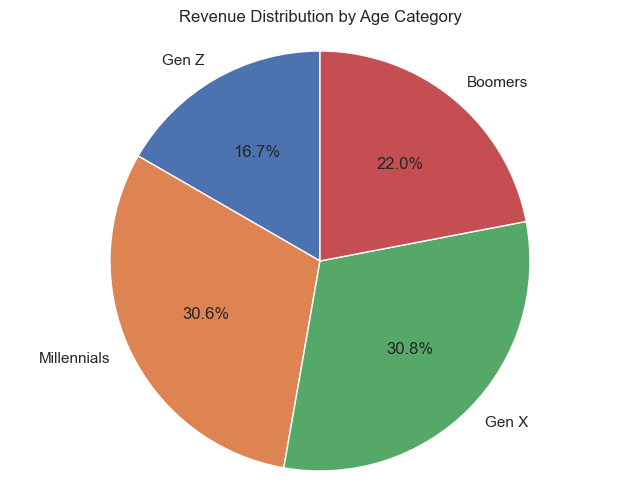

In [50]:
# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(revenue_by_age_category['Purchase_Amount_(USD)'], labels=revenue_by_age_category['Age_Category'], autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Age Category')
plt.axis('equal') 
plt.show()

<b> Findings </b>

<b> Age Group Preferences by Category: </b>

Millennials are the major customers for the Clothing and Accessories category, followed by Gen X.
Gen X customers show more interest in the Footwear and Outerwear category, followed by Millennials.
Overall, clothing appears to be the most purchased category across all age groups, followed by accessories, and then footwear and outerwear.


<b> Gender-based Purchasing Frequency: </b>

Both males and females tend to make purchases quarterly or once every 3 months on average.
There is a similar trend in purchasing frequencies for other time intervals as well, indicating no significant gender-based difference in purchasing behavior.


<b> Revenue by Age Group </b>

GenX contributes to the most revenue in this dataset, followed by Millenials

### Finding #4 - Demographic Influence on Purchasing Pattern - Managerial Insights

<b>1. Product Offerings and Promotions:</b> Understanding preferred categories by age can help in curating product lines and promotions that appeal to each demographic segment. For instance, if Clothing and Accessories are universally popular, these categories can be prioritized in marketing materials sent to all age groups, while more niche categories may be targeted to specific age groups based on their preferences.

<b>2. Engagement Strategies:</b> Frequency of purchase data suggests the need for different engagement strategies by gender. For instance, promotional campaigns might be more frequent or offer different incentives for genders that shop less often to increase their shopping frequency.

<b>3. Tailoring Marketing Campaigns:</b> These insights can guide tailored marketing campaigns. For example, older demographics (Millenials and Gen X) which contribute to higher revenue could be targeted with product lines that are frequently purchased by them.